In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score

In [313]:
df = pd.read_csv('all_purchases.csv')

In [314]:
df = df.drop('Unnamed: 0', axis = 1)

In [315]:
pd.set_option('display.max_columns', None)
df

,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,cust_type,cust_rel,residence_index,foreigner_index,spouse_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,15889,F,ES,V,56,1/16/1995,0.0,255,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,326124.90,01 - TOP,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
1,15890,A,ES,V,63,1/16/1995,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,71461.20,01 - TOP,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
2,15891,N,ES,H,59,7/28/2015,0.0,246,99.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15892,F,ES,H,62,1/16/1995,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,01 - TOP,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
4,15893,N,ES,V,63,10/3/1997,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,1553685,N,ES,V,52,5/31/2016,1.0,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,13.0,CIUDAD REAL,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956641,1553686,N,ES,H,30,5/31/2016,1.0,0,1.0,NaN,NaN,S,S,NaN,NaN,N,1.0,41.0,SEVILLA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956642,1553687,N,ES,V,21,5/31/2016,1.0,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,MADRID,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956643,1553688,N,ES,H,43,5/31/2016,1.0,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,39.0,CANTABRIA,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [316]:
df.head(5)

,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,cust_type,cust_rel,residence_index,foreigner_index,spouse_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,15889,F,ES,V,56,1/16/1995,0.0,255,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,326124.90,01 - TOP,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
1,15890,A,ES,V,63,1/16/1995,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,71461.20,01 - TOP,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
2,15891,N,ES,H,59,7/28/2015,0.0,246,99.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15892,F,ES,H,62,1/16/1995,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,01 - TOP,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
4,15893,N,ES,V,63,10/3/1997,0.0,256,1.0,1.0,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,430477.41,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0


In [317]:
for i in df.columns:
    print(i,":" ,df[i].dtype)

cust_code : int64
emp_index : object
country : object
sex : object
age : object
cust_date : object
new_cust : float64
cust_seniority : object
indrel : float64
cust_type : object
cust_rel : object
residence_index : object
foreigner_index : object
spouse_index : object
joining_channel : object
deceased : object
address_type : float64
prov_code : float64
prov_name : object
activity_index : float64
income : float64
segmentation : object
savings_account : int64
guarentees : int64
current_account : int64
derivative_account : int64
payroll_account : int64
junior_account : int64
mas_account : int64
perticular_account : int64
perticular_plus : int64
st_deposit : int64
mt_deposits : int64
lt_deposits : int64
e_account : int64
funds : int64
mortgage : int64
pension : int64
loan : int64
tax : int64
credit_card : int64
securities : int64
home_account : int64
payroll : int64
pension2 : int64
direct_debit : int64


In [ ]:
# Feature eningeering

In [318]:
df.joining_channel.value_counts()

KHE    254204
KAT    208391
KFC    203034
KHQ     76220
KHM     33245
        ...  
KDL         1
KDI         1
KHR         1
KGN         1
25          1
Name: joining_channel, Length: 162, dtype: int64

In [319]:
joining_feature_engineering = df.joining_channel.value_counts()

In [320]:
joining_feature_engineering = pd.DataFrame(joining_feature_engineering,columns=['joining_channel'])

In [321]:
finalized = joining_feature_engineering[joining_feature_engineering.joining_channel >10000].index

In [322]:
for i in range(df.shape[0]):
    x = df.loc[i,'joining_channel']
    if x not in finalized:
        df.loc[i,'joining_channel'] = 'Others'

In [323]:
df.joining_channel.value_counts()

KHE       254204
KAT       208391
KFC       203034
Others    119449
KHQ        76220
KHM        33245
KFA        26137
KHN        18261
KHK        17704
Name: joining_channel, dtype: int64

In [324]:
df.columns

Index(['cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date',
       'new_cust', 'cust_seniority', 'indrel', 'cust_type', 'cust_rel',
       'residence_index', 'foreigner_index', 'spouse_index', 'joining_channel',
       'deceased', 'address_type', 'prov_code', 'prov_name', 'activity_index',
       'income', 'segmentation', 'savings_account', 'guarentees',
       'current_account', 'derivative_account', 'payroll_account',
       'junior_account', 'mas_account', 'perticular_account',
       'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits',
       'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pension2',
       'direct_debit'],
      dtype='object')

In [326]:
def missing_values(data, categorical_columns):
    for col in data.columns:
        if data[col].isnull().sum()>0:
            if col in categorical_columns:
                data[col] = data[col].fillna(data[col].mode()[0])
                print(col, " null processed")
            else:
                data[col] = data[col].fillna(data[col].median())
                print(col, " null processed")       
                
def get_unique(data):
    for col in data.columns:
            print(col, data[col].dtype)
            print(data[col].unique(),'\n')
            
def change_datatype(data, col, typ):
    for i in col:
        data[i] = data[i].astype(typ)
        
def map_minmax_scaled_numerical(data,columns):
    mmscaler = MinMaxScaler()
    mmscaler.fit(data[columns])
    mmscaled_features = mmscaler.transform(data[columns])
    mm_df = pd.DataFrame(mmscaled_features,columns=columns)
    for col in columns:
        data[columns] = mm_df[columns]
        print("Mapped: ", col)
    
def map_standard_scaled_numerical(data,columns):
    scaler = StandardScaler()
    scaler.fit(data[columns])
    scaled_features = scaler.transform(data[columns])
    df = pd.DataFrame(scaled_features,columns=columns)
    for col in columns:
        data[columns] = df[columns]
        print("Mapped: ", col)

In [327]:
missing_values(df,categorical_columns)

emp_index  null processed
country  null processed
sex  null processed
cust_date  null processed
new_cust  null processed
indrel  null processed
cust_type  null processed
cust_rel  null processed
residence_index  null processed
foreigner_index  null processed
spouse_index  null processed
deceased  null processed
address_type  null processed
prov_code  null processed
prov_name  null processed
activity_index  null processed
income  null processed
segmentation  null processed


In [328]:
df.isnull().sum()

cust_code             0
emp_index             0
country               0
sex                   0
age                   0
cust_date             0
new_cust              0
cust_seniority        0
indrel                0
cust_type             0
cust_rel              0
residence_index       0
foreigner_index       0
spouse_index          0
joining_channel       0
deceased              0
address_type          0
prov_code             0
prov_name             0
activity_index        0
income                0
segmentation          0
savings_account       0
guarentees            0
current_account       0
derivative_account    0
payroll_account       0
junior_account        0
mas_account           0
perticular_account    0
perticular_plus       0
st_deposit            0
mt_deposits           0
lt_deposits           0
e_account             0
funds                 0
mortgage              0
pension               0
loan                  0
tax                   0
credit_card           0
securities      

In [330]:
get_unique(df)

cust_code int64
[  15889   15890   15891 ... 1553687 1553688 1553689] 

emp_index object
['F' 'A' 'N' 'B' 'S'] 

country object
['ES' 'PT' 'NL' 'AD' 'IN' 'VE' 'US' 'FR' 'GB' 'IT' 'DE' 'MX' 'CL' 'CO'
 'CH' 'CR' 'PE' 'JP' 'AT' 'AR' 'AE' 'BE' 'MA' 'CI' 'QA' 'SE' 'BR' 'FI'
 'RS' 'RU' 'AU' 'CU' 'EC' 'KR' 'DO' 'LU' 'GH' 'CZ' 'PA' 'IE' 'BO' 'CM'
 'KE' 'CA' 'GR' 'ZA' 'RO' 'KH' 'IL' 'NG' 'DK' 'NZ' 'MM' 'SG' 'UY' 'NI'
 'EG' 'GI' 'PH' 'KW' 'VN' 'TH' 'NO' 'GQ' 'BY' 'AO' 'UA' 'CN' 'TR' 'PL'
 'OM' 'GA' 'GE' 'BG' 'HR' 'PR' 'HK' 'HN' 'BA' 'MD' 'HU' 'SK' 'TN' 'TG'
 'SA' 'MR' 'DZ' 'LB' 'MT' 'SV' 'PK' 'PY' 'LY' 'MK' 'EE' 'SN' 'MZ' 'GT'
 'GN' 'TW' 'IS' 'LT' 'CD' 'KZ' 'BZ' 'CF' 'GM' 'ET' 'SL' 'GW' 'LV' 'CG'
 'ML' 'BM' 'ZW' 'AL' 'DJ' 'JM'] 

sex object
['V' 'H'] 

age object
['56' '63' '59' '62' '60' '50' '61' '57' '49' '58' '51' '54' '53' '48'
 '55' '52' '71' '46' '66' '69' '65' '67' '70' '72' '78' '68' '80' '47'
 '92' '84' '86' '88' '74' '98' '76' '64' '82' '81' '77' '45' '44' '89'
 '75' '85' ' NA' '79' '

In [331]:
df.cust_type[df.cust_type == 'P'] = '5'
df.cust_type[df.cust_type == '1.0'] = '1'
df.cust_type[df.cust_type == '2.0'] = '2'
df.cust_type[df.cust_type == '3.0'] = '3'
df.cust_type[df.cust_type == '4.0'] = '4'
df.residence_index[df.residence_index == 'S'] = 1
df.residence_index[df.residence_index == 'N'] = 0
df.foreigner_index[df.foreigner_index == 'S'] = 1
df.foreigner_index[df.foreigner_index == 'N'] = 0
df.indrel[df.indrel == 1.0] = 1
df.indrel[df.indrel == 99.0] = 0
df.deceased[df.deceased == 'S'] = 1
df.deceased[df.deceased == 'N'] = 0

df.cust_type = df.cust_type.astype(str)

In [378]:
df.sex[df.sex == 38.0] = df['sex'].mode()[0]
df.joining_channel[df.joining_channel == 38.0] = df['joining_channel'].mode()[0]
df.segmentation[df.segmentation == 38.0] = df['segmentation'].mode()[0]
df.cust_rel[df.cust_rel == 38.0] = df['cust_rel'].mode()[0]

In [333]:
change_datatype(df,['new_cust','residence_index','foreigner_index','indrel','deceased','address_type'] ,int)

In [334]:
get_unique(df)

cust_code int64
[  15889   15890   15891 ... 1553687 1553688 1553689] 

emp_index object
['F' 'A' 'N' 'B' 'S'] 

country object
['ES' 'PT' 'NL' 'AD' 'IN' 'VE' 'US' 'FR' 'GB' 'IT' 'DE' 'MX' 'CL' 'CO'
 'CH' 'CR' 'PE' 'JP' 'AT' 'AR' 'AE' 'BE' 'MA' 'CI' 'QA' 'SE' 'BR' 'FI'
 'RS' 'RU' 'AU' 'CU' 'EC' 'KR' 'DO' 'LU' 'GH' 'CZ' 'PA' 'IE' 'BO' 'CM'
 'KE' 'CA' 'GR' 'ZA' 'RO' 'KH' 'IL' 'NG' 'DK' 'NZ' 'MM' 'SG' 'UY' 'NI'
 'EG' 'GI' 'PH' 'KW' 'VN' 'TH' 'NO' 'GQ' 'BY' 'AO' 'UA' 'CN' 'TR' 'PL'
 'OM' 'GA' 'GE' 'BG' 'HR' 'PR' 'HK' 'HN' 'BA' 'MD' 'HU' 'SK' 'TN' 'TG'
 'SA' 'MR' 'DZ' 'LB' 'MT' 'SV' 'PK' 'PY' 'LY' 'MK' 'EE' 'SN' 'MZ' 'GT'
 'GN' 'TW' 'IS' 'LT' 'CD' 'KZ' 'BZ' 'CF' 'GM' 'ET' 'SL' 'GW' 'LV' 'CG'
 'ML' 'BM' 'ZW' 'AL' 'DJ' 'JM'] 

sex object
['V' 'H'] 

age object
['56' '63' '59' '62' '60' '50' '61' '57' '49' '58' '51' '54' '53' '48'
 '55' '52' '71' '46' '66' '69' '65' '67' '70' '72' '78' '68' '80' '47'
 '92' '84' '86' '88' '74' '98' '76' '64' '82' '81' '77' '45' '44' '89'
 '75' '85' ' NA' '79' '

In [335]:
df.drop(['spouse_index'],axis=1,inplace=True)

In [336]:
categorical_columns = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'cust_date', 'new_cust',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'segmentation']

numerical_columns = ['age','cust_seniority','income']

target_columns = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']

In [340]:
df[df.age == ' NA'] = np.median(np.median(np.array(df.age[df.age != ' NA'], dtype = int)))
df.cust_seniority[(df.cust_seniority == '     NA') | (df.cust_seniority == -999999.0)] = np.median(np.array(df.age[df.cust_seniority != '     NA'], dtype=int))
df.cust_seniority = df.cust_seniority.astype(float)
df.age = df.age.astype('int')

In [341]:
user_features = ['sex', 'new_cust', 'cust_rel','joining_channel', 'prov_name', 'activity_index', 'segmentation', 'age', 'cust_seniority', 'income']

In [379]:
df[user_features].describe()

,new_cust,activity_index,age,cust_seniority,income
count,956645.000000,956645.000000,956645.000000,956645.000000,9.566450e+05
mean,0.333335,0.703035,40.136448,78.686387,1.248984e+05
std,3.299473,3.297434,17.106529,67.160659,2.008197e+05
min,0.000000,0.000000,2.000000,0.000000,3.800000e+01
25%,0.000000,0.000000,25.000000,22.000000,7.776624e+04
50%,0.000000,0.000000,38.000000,53.000000,1.014893e+05
75%,0.000000,1.000000,50.000000,133.000000,1.315843e+05
max,38.000000,38.000000,164.000000,256.000000,2.889440e+07


In [343]:
# columns for one-hot encoding

onehot_columns = ['joining_channel','sex', 'cust_rel', 'segmentation']

binary_columns = ['prov_name']
#['cust_code','cust_date','country', 'joining_channel', 'prov_code','prov_name']

In [380]:
cust = df[user_features]

In [373]:
cust.columns

Index(['sex', 'new_cust', 'cust_rel', 'joining_channel', 'prov_name',
       'activity_index', 'segmentation', 'age', 'cust_seniority', 'income'],
      dtype='object')

In [368]:
cust.drop_duplicates(keep='last' ,inplace=True,ignore_index=True)

In [347]:
df.shape

(956645, 45)

In [348]:
cust.shape

(861300, 10)

In [369]:
cust

,sex,new_cust,cust_rel,joining_channel,prov_name,activity_index,segmentation,age,cust_seniority,income
0,V,0,A,KAT,MADRID,1.0,01 - TOP,56,255.0,326124.90
1,V,0,A,KAT,MADRID,1.0,01 - TOP,63,256.0,71461.20
2,H,0,A,KAT,MADRID,0.0,02 - PARTICULARES,59,246.0,101489.34
3,H,0,A,KAT,MADRID,1.0,01 - TOP,62,256.0,430477.41
4,V,0,A,KAT,MADRID,1.0,02 - PARTICULARES,63,256.0,430477.41
...,...,...,...,...,...,...,...,...,...,...
861295,V,1,I,Others,CIUDAD REAL,0.0,02 - PARTICULARES,52,0.0,101489.34
861296,H,1,I,Others,SEVILLA,0.0,02 - PARTICULARES,30,0.0,101489.34
861297,V,1,I,Others,MADRID,0.0,02 - PARTICULARES,21,0.0,101489.34
861298,H,1,I,Others,CANTABRIA,0.0,02 - PARTICULARES,43,0.0,101489.34


In [ ]:
# encoding

In [381]:
enc_oh= ce.OneHotEncoder(cols=onehot_columns ,handle_unknown='return_nan',return_df=True,use_cat_names=True)
enc_be= ce.BinaryEncoder(cols=binary_columns,return_df=True)

In [382]:
cust_enc = enc_oh.fit_transform(cust)

In [383]:
cust_enc.columns

Index(['sex_V', 'sex_H', 'new_cust', 'cust_rel_A', 'cust_rel_I', 'cust_rel_P',
       'cust_rel_R', 'joining_channel_KAT', 'joining_channel_KFA',
       'joining_channel_Others', 'joining_channel_KFC', 'joining_channel_KHK',
       'joining_channel_KHN', 'joining_channel_KHE', 'joining_channel_KHM',
       'joining_channel_KHQ', 'prov_name', 'activity_index',
       'segmentation_01 - TOP', 'segmentation_02 - PARTICULARES',
       'segmentation_03 - UNIVERSITARIO', 'age', 'cust_seniority', 'income'],
      dtype='object')

In [385]:
cust_enc2 = enc_be.fit_transform(cust_enc)

In [386]:
print(cust_enc2.columns)
print(len(cust_enc2.columns))

Index(['sex_V', 'sex_H', 'new_cust', 'cust_rel_A', 'cust_rel_I', 'cust_rel_P',
       'cust_rel_R', 'joining_channel_KAT', 'joining_channel_KFA',
       'joining_channel_Others', 'joining_channel_KFC', 'joining_channel_KHK',
       'joining_channel_KHN', 'joining_channel_KHE', 'joining_channel_KHM',
       'joining_channel_KHQ', 'prov_name_0', 'prov_name_1', 'prov_name_2',
       'prov_name_3', 'prov_name_4', 'prov_name_5', 'activity_index',
       'segmentation_01 - TOP', 'segmentation_02 - PARTICULARES',
       'segmentation_03 - UNIVERSITARIO', 'age', 'cust_seniority', 'income'],
      dtype='object')
29


In [ ]:
# scaling

In [387]:
map_minmax_scaled_numerical(cust_enc2,numerical_columns)

Mapped:  age
Mapped:  cust_seniority
Mapped:  income


In [388]:
cust_enc2[numerical_columns].describe()

,age,cust_seniority,income
count,956645.000000,956645.000000,956645.000000
mean,0.235410,0.307369,0.004321
std,0.105596,0.262346,0.006950
min,0.000000,0.000000,0.000000
25%,0.141975,0.085938,0.002690
50%,0.222222,0.207031,0.003511
75%,0.296296,0.519531,0.004553
max,1.000000,1.000000,1.000000


In [389]:
cust_enc2[numerical_columns].isnull().sum()

age               0
cust_seniority    0
income            0
dtype: int64

In [390]:
cust_enc2[numerical_columns].describe().round(2)

,age,cust_seniority,income
count,956645.00,956645.00,956645.00
mean,0.24,0.31,0.00
std,0.11,0.26,0.01
min,0.00,0.00,0.00
25%,0.14,0.09,0.00
50%,0.22,0.21,0.00
75%,0.30,0.52,0.00
max,1.00,1.00,1.00


In [55]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

In [360]:
cust

,sex,new_cust,cust_rel,joining_channel,prov_name,activity_index,segmentation,age,cust_seniority,income
0,V,0,A,KAT,MADRID,1.0,01 - TOP,56,255.0,326124.90
1,V,0,A,KAT,MADRID,1.0,01 - TOP,63,256.0,71461.20
2,H,0,A,KAT,MADRID,0.0,02 - PARTICULARES,59,246.0,101489.34
3,H,0,A,KAT,MADRID,1.0,01 - TOP,62,256.0,430477.41
4,V,0,A,KAT,MADRID,1.0,02 - PARTICULARES,63,256.0,430477.41
...,...,...,...,...,...,...,...,...,...,...
861295,V,1,I,Others,CIUDAD REAL,0.0,02 - PARTICULARES,52,0.0,101489.34
861296,H,1,I,Others,SEVILLA,0.0,02 - PARTICULARES,30,0.0,101489.34
861297,V,1,I,Others,MADRID,0.0,02 - PARTICULARES,21,0.0,101489.34
861298,H,1,I,Others,CANTABRIA,0.0,02 - PARTICULARES,43,0.0,101489.34


# Model Building

In [222]:
kmeans_1 = KMeans(n_clusters=3,random_state= 1023)

predictions = kmeans_1.fit_predict(cust_enc2)

score_kemans_s = silhouette_score(cust_enc2, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cust_enc2, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cust_enc2, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.2744
Calinski Harabasz Score: 296029.8276
Davies Bouldin Score: 1.4934


### Agglomerative

In [214]:
cust_enc2

,sex_V,sex_H,sex_38.0,new_cust,cust_rel_A,cust_rel_I,cust_rel_P,cust_rel_R,cust_rel_38.0,joining_channel_KAT,joining_channel_KFA,joining_channel_Others,joining_channel_KFC,joining_channel_KHK,joining_channel_KHM,joining_channel_KHN,joining_channel_KHE,joining_channel_KHQ,joining_channel_38.0,prov_name_0,prov_name_1,prov_name_2,prov_name_3,prov_name_4,prov_name_5,activity_index,segmentation_01 - TOP,segmentation_02 - PARTICULARES,segmentation_03 - UNIVERSITARIO,segmentation_38.0,age,cust_seniority,income,cluster
0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.333333,0.996094,0.011285,0
1,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.376543,1.000000,0.002472,0
2,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.351852,0.960938,0.003511,0
3,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.370370,1.000000,0.014897,0
4,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.376543,1.000000,0.014897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861295,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.308642,0.000000,0.003511,2
861296,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.172840,0.000000,0.003511,2
861297,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.117284,0.000000,0.003511,2
861298,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.253086,0.000000,0.003511,2


In [289]:
X=cust_enc2.sample(n=100000,random_state=11011)

In [218]:
model_agg = AgglomerativeClustering(n_clusters=3)
model_agg.fit(cust_enc2.sample(n=10000))

AgglomerativeClustering(n_clusters=3)

In [219]:
model_agg.labels_

array([2, 0, 0, ..., 2, 0, 1], dtype=int64)

In [232]:
def evaluation_metrics(data,model):
    model.fit(X)
    predictions = model.fit_predict(X)
    score_kemans_s = silhouette_score(data, model.labels_, metric='euclidean')
    score_kemans_c = calinski_harabasz_score(data, model.labels_)
    score_kemans_d = davies_bouldin_score(data, predictions)
    print('Silhouette Score: %.4f' % score_kemans_s)
    print('Calinski Harabasz Score: %.4f' % score_kemans_c)
    print('Davies Bouldin Score: %.4f' % score_kemans_d)

In [230]:
model_agg = AgglomerativeClustering(n_clusters=3).fit(X)
prediction_agg = model_agg.fit_predict(X)
print('Model done')
evaluation_metrics(X,model_agg,prediction_agg)

Model done
Silhouette Score: 0.2689
Calinski Harabasz Score: 3317.7118
Davies Bouldin Score: 1.5255


In [237]:
evaluation_metrics(X,model_agg)

Silhouette Score: 0.2669
Calinski Harabasz Score: 6571.1656
Davies Bouldin Score: 1.5319


### DBSCAN

In [275]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=3) 
nbrs=neighb.fit(X) 
distances,indices=nbrs.kneighbors(X) 

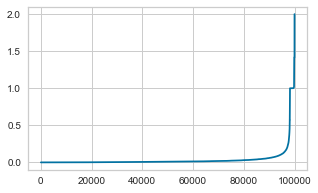

In [276]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show()

In [282]:
pip install kneed

2.0200602291741423


<Figure size 360x360 with 0 Axes>

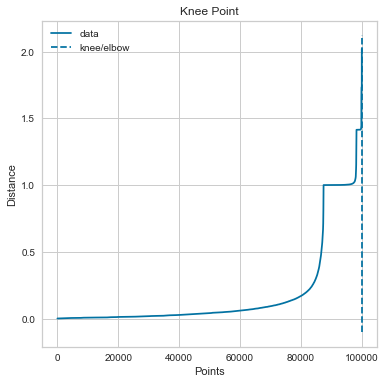

In [290]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [291]:
from sklearn.cluster import DBSCAN
min_samples = 2*(len(X.columns))
print(min_samples)
dbscan = DBSCAN(eps = distances[knee.knee], min_samples = min_samples).fit(X)
labels = dbscan.labels_ 

68


In [292]:
len(set(labels))

1

In [287]:
evaluation_metrics(X,dbscan)

Silhouette Score: 0.0695
Calinski Harabasz Score: 319.3406
Davies Bouldin Score: 1.4907


# Gaussian 

In [415]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, init_params='kmeans')
model.fit(X)
print(model.aic(X))

-14200643.063401973


# BIRCH

In [416]:
from sklearn.cluster import Birch

In [417]:
model_birch = Birch(threshold=0.01, n_clusters=3)
model_birch.fit(X)

Birch(threshold=0.01)

In [418]:
evaluation_metrics(X,model_birch)

Silhouette Score: 0.2589
Calinski Harabasz Score: 32226.4784
Davies Bouldin Score: 1.4629


In [ ]:
# ideal clusters 

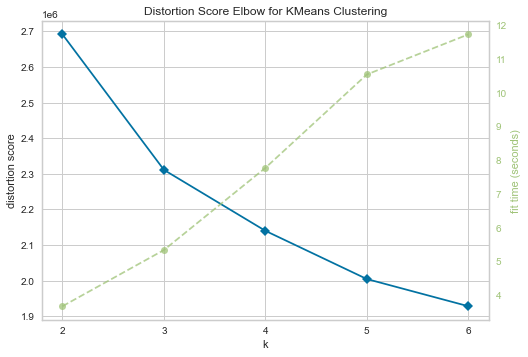

In [407]:
# min max scaled 
def elbow_validation(data,n):
    fig, ax = plt.subplots()

    visualizer = KElbowVisualizer(KMeans(), k=(2,n),ax=ax)
    visualizer.fit(data)

    ax.set_xticks(range(2,n))
    visualizer.show()
    plt.show()
    
elbow_validation(cust_enc2,n=7)

In [ ]:
# cluster stability check

In [409]:
X = cust_enc2.sample(n=10000)

2
[0.1818057317448334]
3
[0.1818057317448334, 0.1912617835366595]
4
[0.1818057317448334, 0.1912617835366595, 0.19083061510377688]
5
[0.1818057317448334, 0.1912617835366595, 0.19083061510377688, 0.17393794587325132]
6
[0.1818057317448334, 0.1912617835366595, 0.19083061510377688, 0.17393794587325132, 0.1741967085380712]


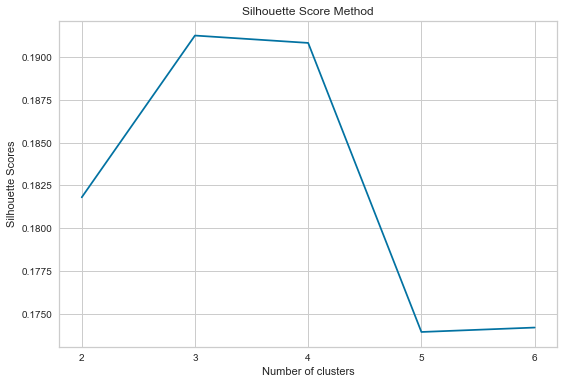

In [410]:
X = cust_enc2.sample(n=10000)

silhouette_scores = []
for k in range(2,7):
    print(k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, 
                random_state=432)
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    print(silhouette_scores)

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

2
[0.2571771238434466]
3
[0.2571771238434466, 0.27400777364503]
4
[0.2571771238434466, 0.27400777364503, 0.22904380298301777]
5
[0.2571771238434466, 0.27400777364503, 0.22904380298301777, 0.1927021117412664]
6
[0.2571771238434466, 0.27400777364503, 0.22904380298301777, 0.1927021117412664, 0.17123246646506457]


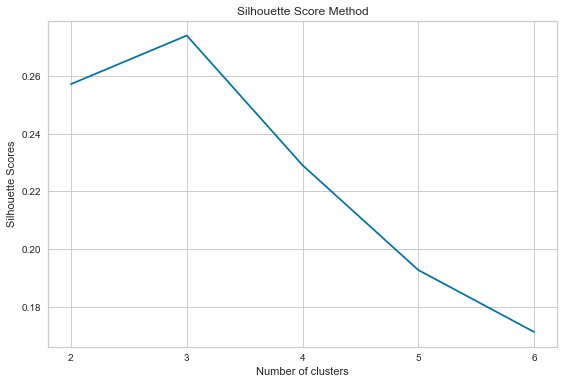

In [430]:
X = cust_enc2.sample(n=100000)

silhouette_scores = []
for k in range(2,7):
    print(k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, 
                random_state=432)
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    print(silhouette_scores)

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

2
[0.25765006962573217]
3
[0.25765006962573217, 0.2740776606741209]
4
[0.25765006962573217, 0.2740776606741209, 0.2294619961736452]
5
[0.25765006962573217, 0.2740776606741209, 0.2294619961736452, 0.20205751388087217]
6
[0.25765006962573217, 0.2740776606741209, 0.2294619961736452, 0.20205751388087217, 0.19024926383131763]


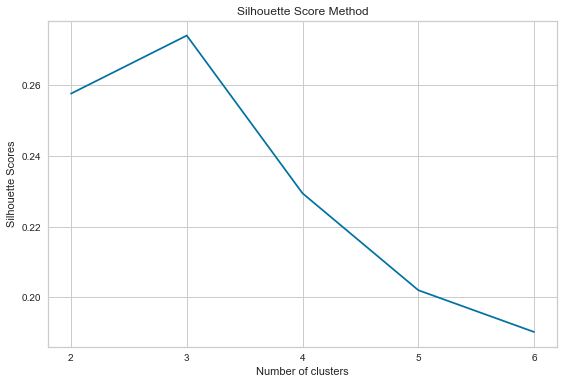

In [431]:
X = cust_enc2.sample(n=200000)

silhouette_scores = []
for k in range(2,7):
    print(k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, 
                random_state=432)
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    print(silhouette_scores)

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

# Kmeans

In [80]:
#kmeans = KMeans(n_clusters=5, n_init= 150 ,random_state = 101)
kmeans = KMeans(n_clusters=3, n_init= 10 ,random_state = 101)
kmeans.fit(cust_enc2)
print(kmeans.inertia_)
print(kmeans.n_init)
pred = kmeans.predict(cust_enc2)
frame = pd.DataFrame(cust_enc2)
frame['cluster'] = pred
frame['cluster'].value_counts()

2311086.315151165
10


0    330157
2    280857
1    250286
Name: cluster, dtype: int64

In [81]:
frame

,sex_V,sex_H,sex_38.0,new_cust,cust_rel_A,cust_rel_I,cust_rel_P,cust_rel_R,cust_rel_38.0,joining_channel_KAT,joining_channel_KFA,joining_channel_Others,joining_channel_KFC,joining_channel_KHK,joining_channel_KHM,joining_channel_KHN,joining_channel_KHE,joining_channel_KHQ,joining_channel_38.0,prov_name_0,prov_name_1,prov_name_2,prov_name_3,prov_name_4,prov_name_5,activity_index,segmentation_01 - TOP,segmentation_02 - PARTICULARES,segmentation_03 - UNIVERSITARIO,segmentation_38.0,age,cust_seniority,income,cluster
0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.333333,0.996094,0.011285,0
1,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.376543,1.000000,0.002472,0
2,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.351852,0.960938,0.003511,0
3,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.370370,1.000000,0.014897,0
4,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.376543,1.000000,0.014897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861295,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.308642,0.000000,0.003511,2
861296,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.172840,0.000000,0.003511,2
861297,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.117284,0.000000,0.003511,2
861298,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.253086,0.000000,0.003511,2


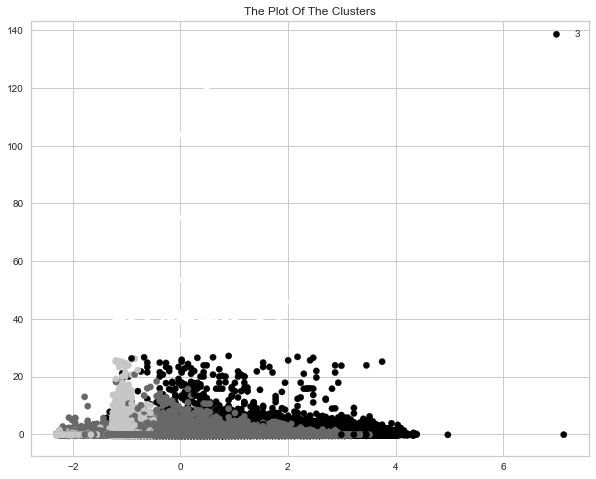

In [117]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(frame['age'],frame['income'], s=40, c=frame["cluster"], marker='o',)
ax.set_title("The Plot Of The Clusters")
plt.legend(frame.cluster)
plt.show()

In [210]:
wcss = []

for i in range(1, 25):
    print("interation number: ",i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(cust_enc2)
    wcss.append(kmeans.inertia_)

interation number:  1
interation number:  2
interation number:  3
interation number:  4
interation number:  5
interation number:  6
interation number:  7
interation number:  8
interation number:  9
interation number:  10
interation number:  11
interation number:  12
interation number:  13
interation number:  14
interation number:  15
interation number:  16
interation number:  17
interation number:  18
interation number:  19
interation number:  20
interation number:  21
interation number:  22
interation number:  23
interation number:  24


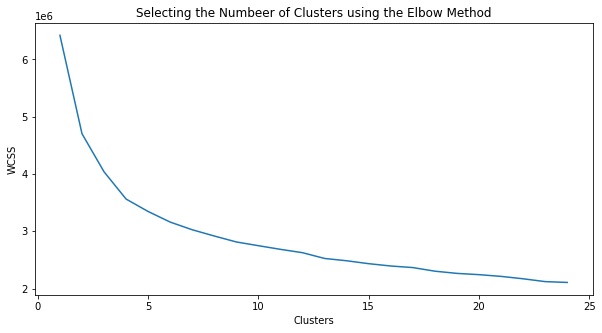

In [211]:
plt.figure(figsize = (10,5))
plt.plot(range(1, 25), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [391]:
kmeans = KMeans(n_clusters=3, n_init= 10 ,random_state = 101)
kmeans.fit(cust_enc2)
print(kmeans.inertia_)
print(kmeans.n_init)
pred = kmeans.predict(cust_enc2)
frame = pd.DataFrame(cust_enc2)
frame['cluster'] = pred
frame['cluster'].value_counts()

3002764.2367891446
10


0    604343
2    345046
1      7256
Name: cluster, dtype: int64

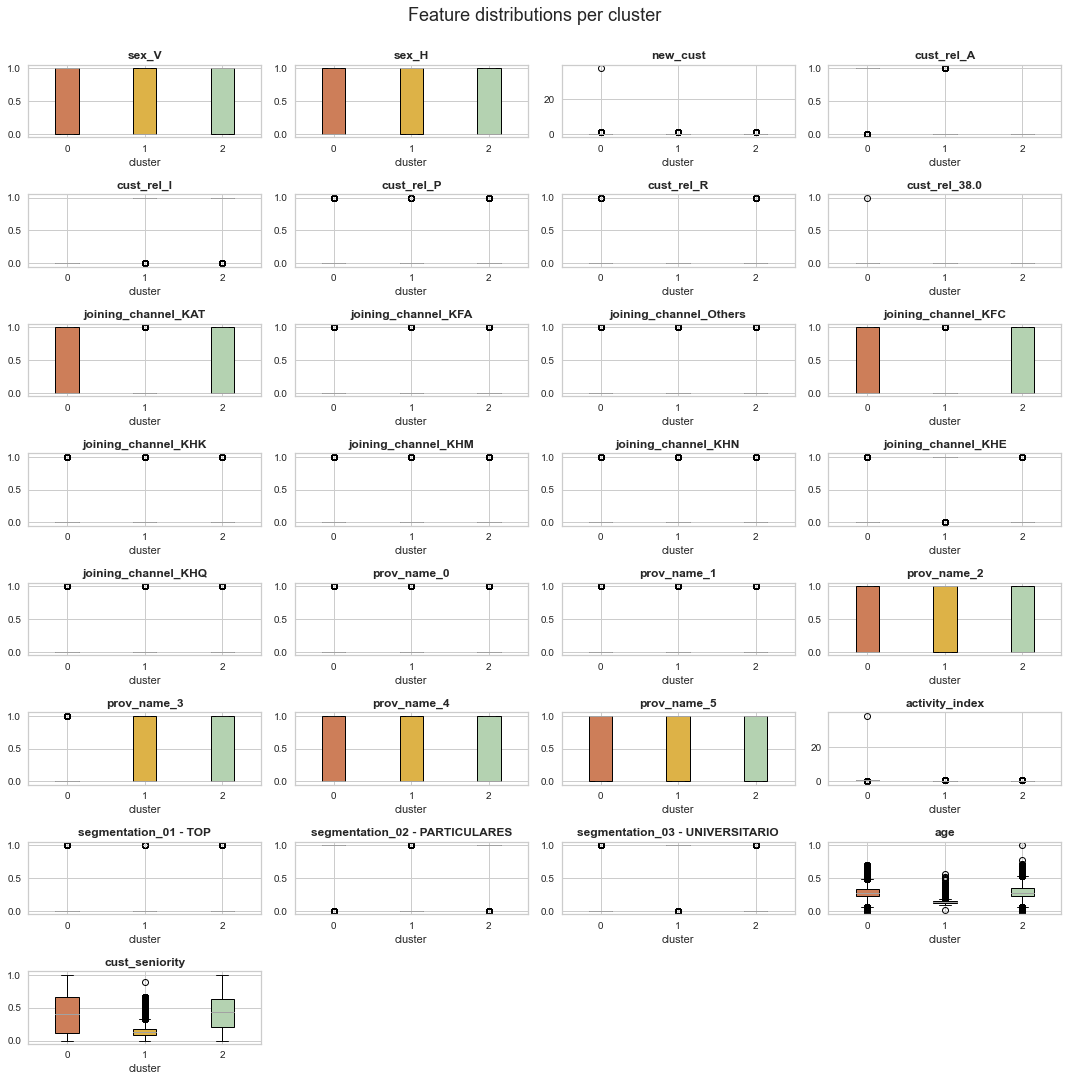

In [412]:
features = kmeans.feature_names_in_[:-1]
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))
cluster_colors = ['#cd7e59', '#ddb247', '#b4d2b1', '#d15252', '#568f8b', '#1d4a60']
for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = frame[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

In [392]:
X_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)

X_dev_rel.drop(columns=['mean'], inplace=True)

X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)

X_std_dev_rel.drop(columns=['mean'], inplace=True)

X_std_mean.drop(columns=['mean'], inplace=True)


In [1]:
# cluster charatercitics 

In [393]:
X_std_mean

,0,1,2
sex_V,0.612720,1.000000,0.420631
sex_H,0.387280,0.000000,0.579369
new_cust,0.061169,38.000000,0.017934
cust_rel_A,0.528821,0.000000,0.232879
cust_rel_I,0.469758,1.000000,0.767054
cust_rel_P,0.001254,0.000000,0.000067
cust_rel_R,0.000167,0.000000,0.000000
joining_channel_KAT,0.334960,0.000000,0.017253
joining_channel_KFA,0.042257,0.000000,0.001719
joining_channel_Others,0.168955,0.000000,0.029700


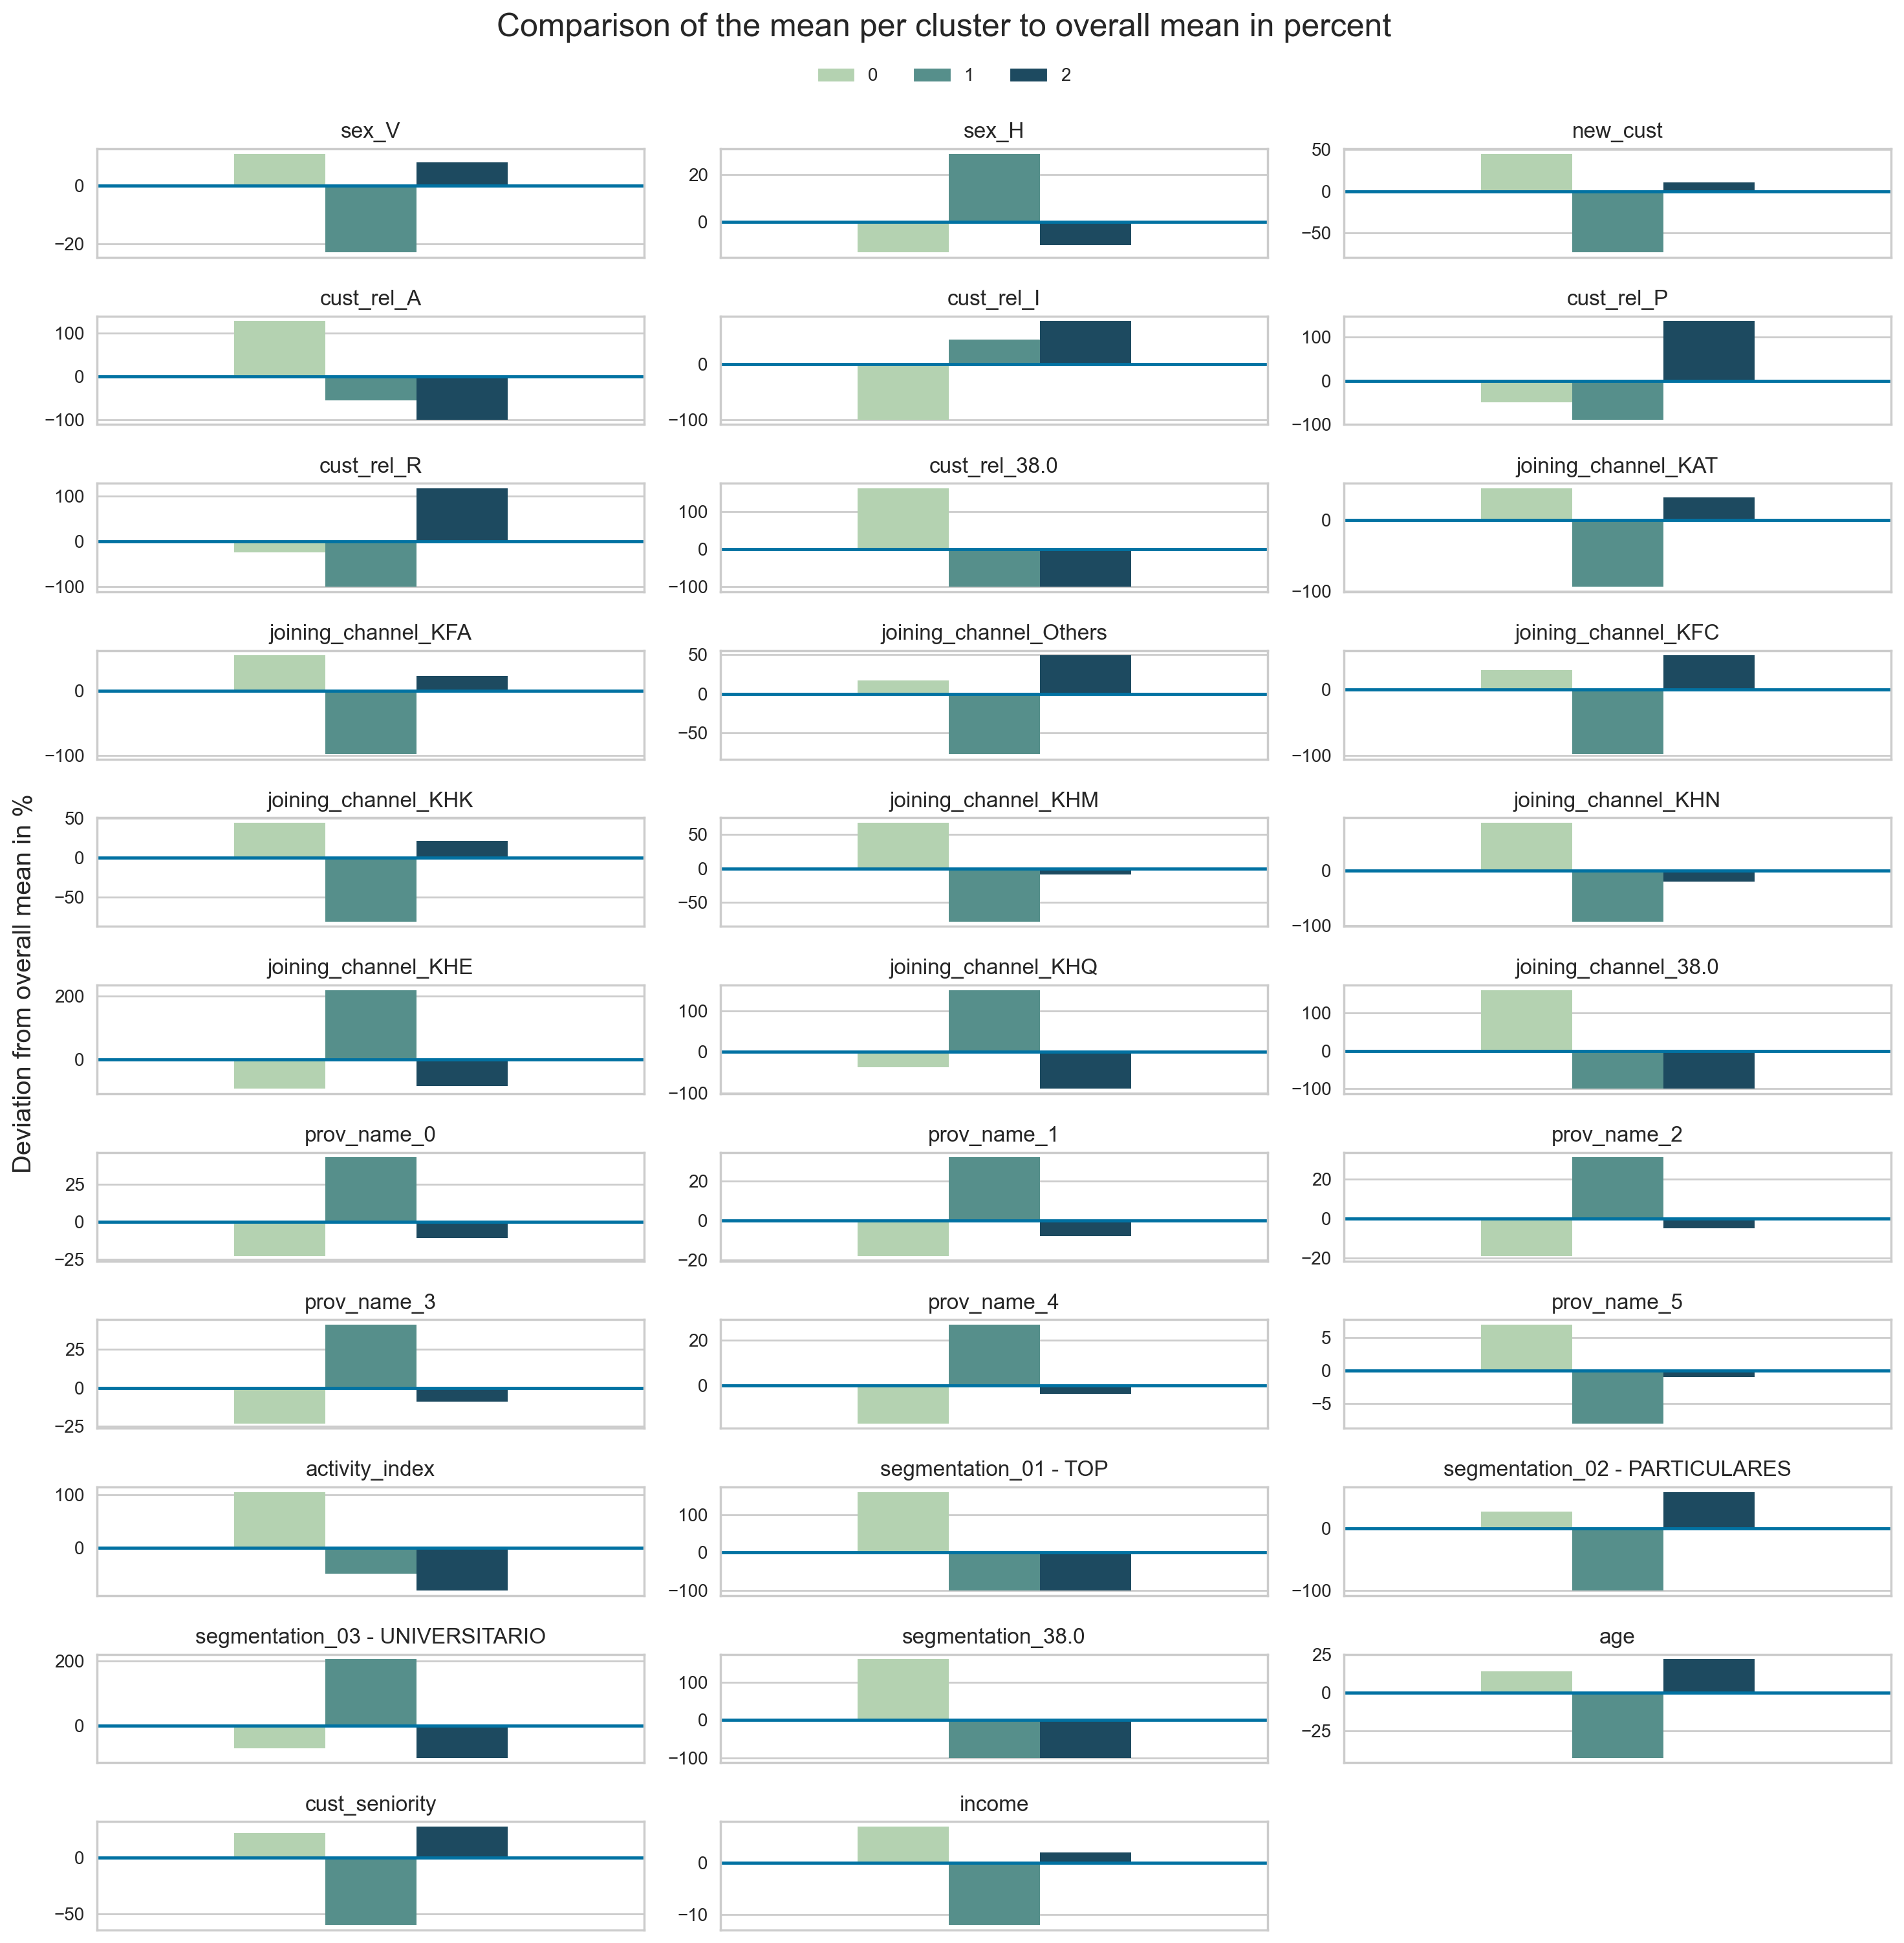

In [374]:
import matplotlib.patches as mpatches
def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):
    
    features = X_comparison.index
    ncols = 3
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    fig = plt.figure(figsize=(15,15), dpi=200)
    for n, feature in enumerate(features):
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature, 
                                                             color=colors[0:frame.cluster.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:frame.cluster.nunique()],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")


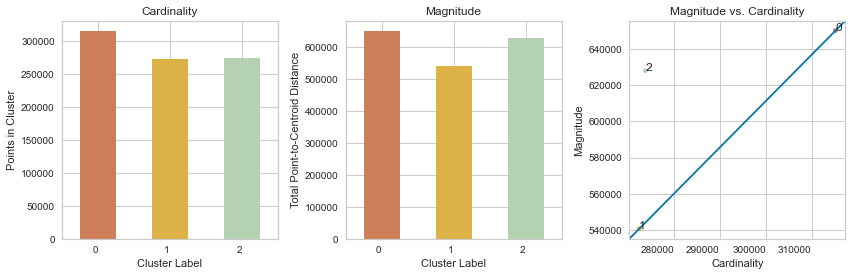

In [238]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(kmeans.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(cust_enc2,
                       kmeans.labels_,
                       kmeans.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(cust_enc2,
                              kmeans.labels_,
                              kmeans.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:kmeans.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

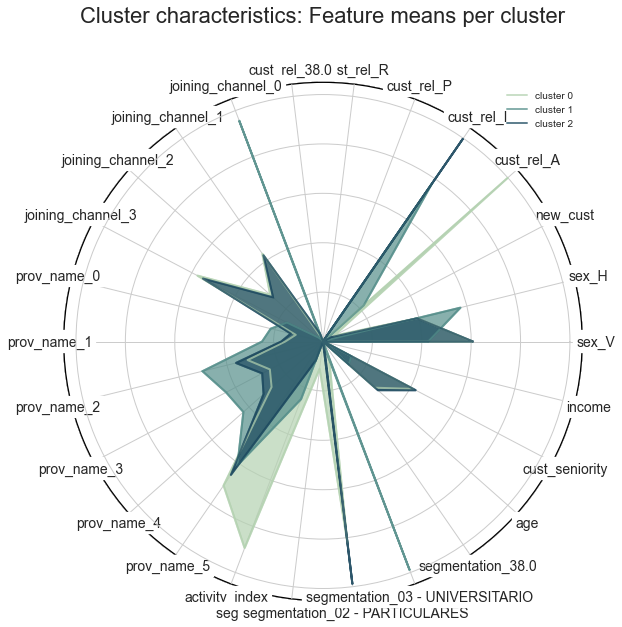

In [250]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans.feature_names_in_)
radar = Radar(fig, kmeans.feature_names_in_ ,np.unique(kmeans.labels_))

for k in range(0,kmeans.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

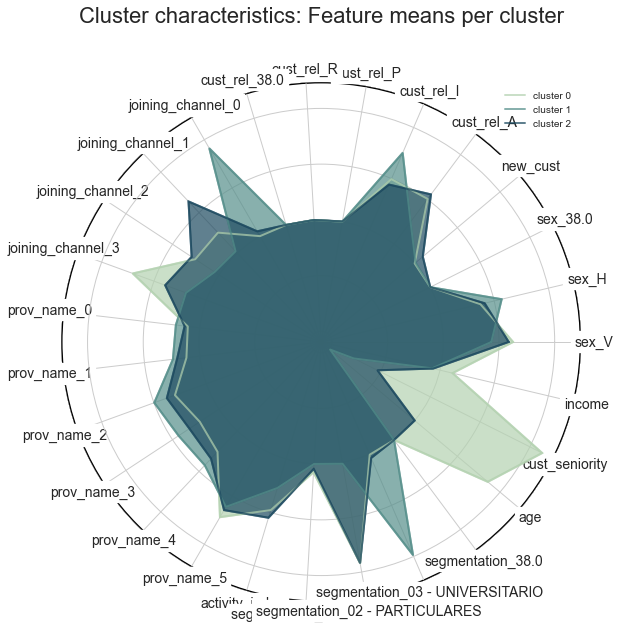

In [240]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans.feature_names_in_[:-1])
radar = Radar(fig, kmeans.feature_names_in_[:-1], np.unique(kmeans.labels_))

for k in range(0,kmeans.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

In [394]:
# product analysis

prod = df[['sex','age','cust_seniority','segmentation','income','prov_name']+target_columns]
prod.drop_duplicates(keep='last' ,inplace=True,ignore_index=True)

In [395]:
prod

,sex,age,cust_seniority,segmentation,income,prov_name,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,V,56,255.0,01 - TOP,326124.90,MADRID,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
1,V,63,256.0,01 - TOP,71461.20,MADRID,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
2,H,59,246.0,02 - PARTICULARES,101489.34,MADRID,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,H,62,256.0,01 - TOP,430477.41,MADRID,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
4,V,63,256.0,02 - PARTICULARES,430477.41,MADRID,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863410,V,52,0.0,02 - PARTICULARES,101489.34,CIUDAD REAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863411,H,30,0.0,02 - PARTICULARES,101489.34,SEVILLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863412,V,21,0.0,02 - PARTICULARES,101489.34,MADRID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863413,H,43,0.0,02 - PARTICULARES,101489.34,CANTABRIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [396]:
prod.direct_debit.mean()

2.0192468280027565

In [397]:
for col in target_columns:
    prod[col][prod[col] > prod[col].mean()] = 1
    prod[col][prod[col] < prod[col].mean()] = 0

In [398]:
prod.direct_debit.value_counts()

0    707025
1    147304
2      9086
Name: direct_debit, dtype: int64

In [399]:
prod.direct_debit[prod.direct_debit == 2]=1

In [400]:
prod.direct_debit.value_counts()

0    707025
1    156390
Name: direct_debit, dtype: int64

In [401]:
onehot_columns = ['sex', 'segmentation']
binary_columns = ['prov_name']

In [402]:
enc_oh1= ce.OneHotEncoder(cols=onehot_columns ,handle_unknown='return_nan',return_df=True,use_cat_names=True)
enc_be1= ce.BinaryEncoder(cols=binary_columns,return_df=True)

In [403]:
prod_enc = enc_oh1.fit_transform(prod)

In [404]:
prod_enc2 = enc_be1.fit_transform(prod_enc)

In [405]:
prod_enc2.columns

Index(['sex_V', 'sex_H', 'age', 'cust_seniority', 'segmentation_01 - TOP',
       'segmentation_02 - PARTICULARES', 'segmentation_03 - UNIVERSITARIO',
       'income', 'prov_name_0', 'prov_name_1', 'prov_name_2', 'prov_name_3',
       'prov_name_4', 'prov_name_5', 'savings_account', 'guarentees',
       'current_account', 'derivative_account', 'payroll_account',
       'junior_account', 'mas_account', 'perticular_account',
       'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits',
       'e_account', 'funds', 'mortgage', 'pension', 'loan', 'tax',
       'credit_card', 'securities', 'home_account', 'payroll', 'pension2',
       'direct_debit'],
      dtype='object')

In [406]:
map_minmax_scaled_numerical(prod_enc2,numerical_columns)

Mapped:  age
Mapped:  cust_seniority
Mapped:  income


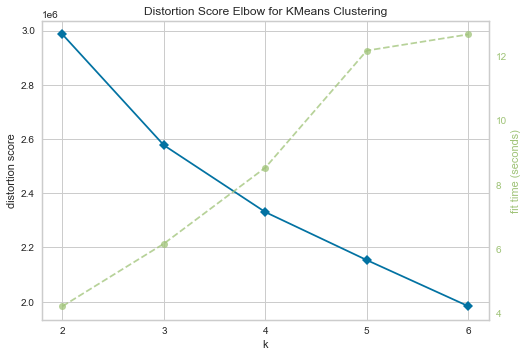

In [326]:
elbow_validation(prod_enc2,n=7)

Iteration for clusters:  2
Iteration for clusters:  3
Iteration for clusters:  4
Iteration for clusters:  5
Iteration for clusters:  6


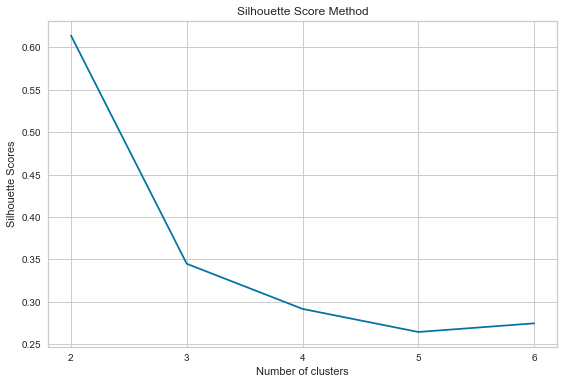

In [336]:
X = prod_enc2.sample(n=100000)

silhouette_scores1 = []
for k in range(2,7):
    print('Iteration for clusters: ',k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, 
arandom_state=432)
    km.fit(X)
    silhouette_scores1.append(silhouette_score(X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores1, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

Iteration for clusters:  2
Iteration for clusters:  3
Iteration for clusters:  4
Iteration for clusters:  5
Iteration for clusters:  6


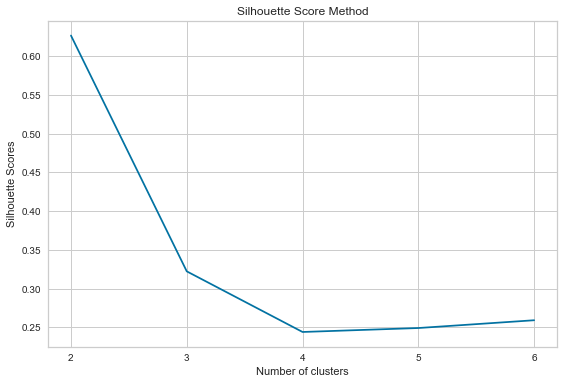

In [342]:
X = prod_enc2.sample(n=200000)

silhouette_scores1 = []
for k in range(2,7):
    print('Iteration for clusters: ',k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, random_state=432)
    km.fit(X)
    silhouette_scores1.append(silhouette_score(X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores1, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

In [407]:
kmeans = KMeans(n_clusters=3, n_init= 10 ,random_state = 101)
kmeans.fit(prod_enc2)
print(kmeans.inertia_)
print(kmeans.n_init)
pred = kmeans.predict(prod_enc2)
frame = pd.DataFrame(prod_enc2)
frame['cluster'] = pred
frame['cluster'].value_counts()

2576652.1116754073
10


2    446578
1    360911
0     55926
Name: cluster, dtype: int64

In [408]:
X_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

In [409]:
X_std_mean

,0,1,2
sex_V,0.549422,0.000000,1.000000
sex_H,0.450578,1.000000,0.000000
age,0.214747,0.233543,0.256657
cust_seniority,0.146845,0.307443,0.372984
segmentation_01 - TOP,0.055752,0.033166,0.046888
segmentation_02 - PARTICULARES,0.552641,0.566450,0.696317
segmentation_03 - UNIVERSITARIO,0.391607,0.400384,0.256795
income,0.003962,0.004434,0.004498
prov_name_0,0.168312,0.153082,0.146266
prov_name_1,0.220327,0.185744,0.181131


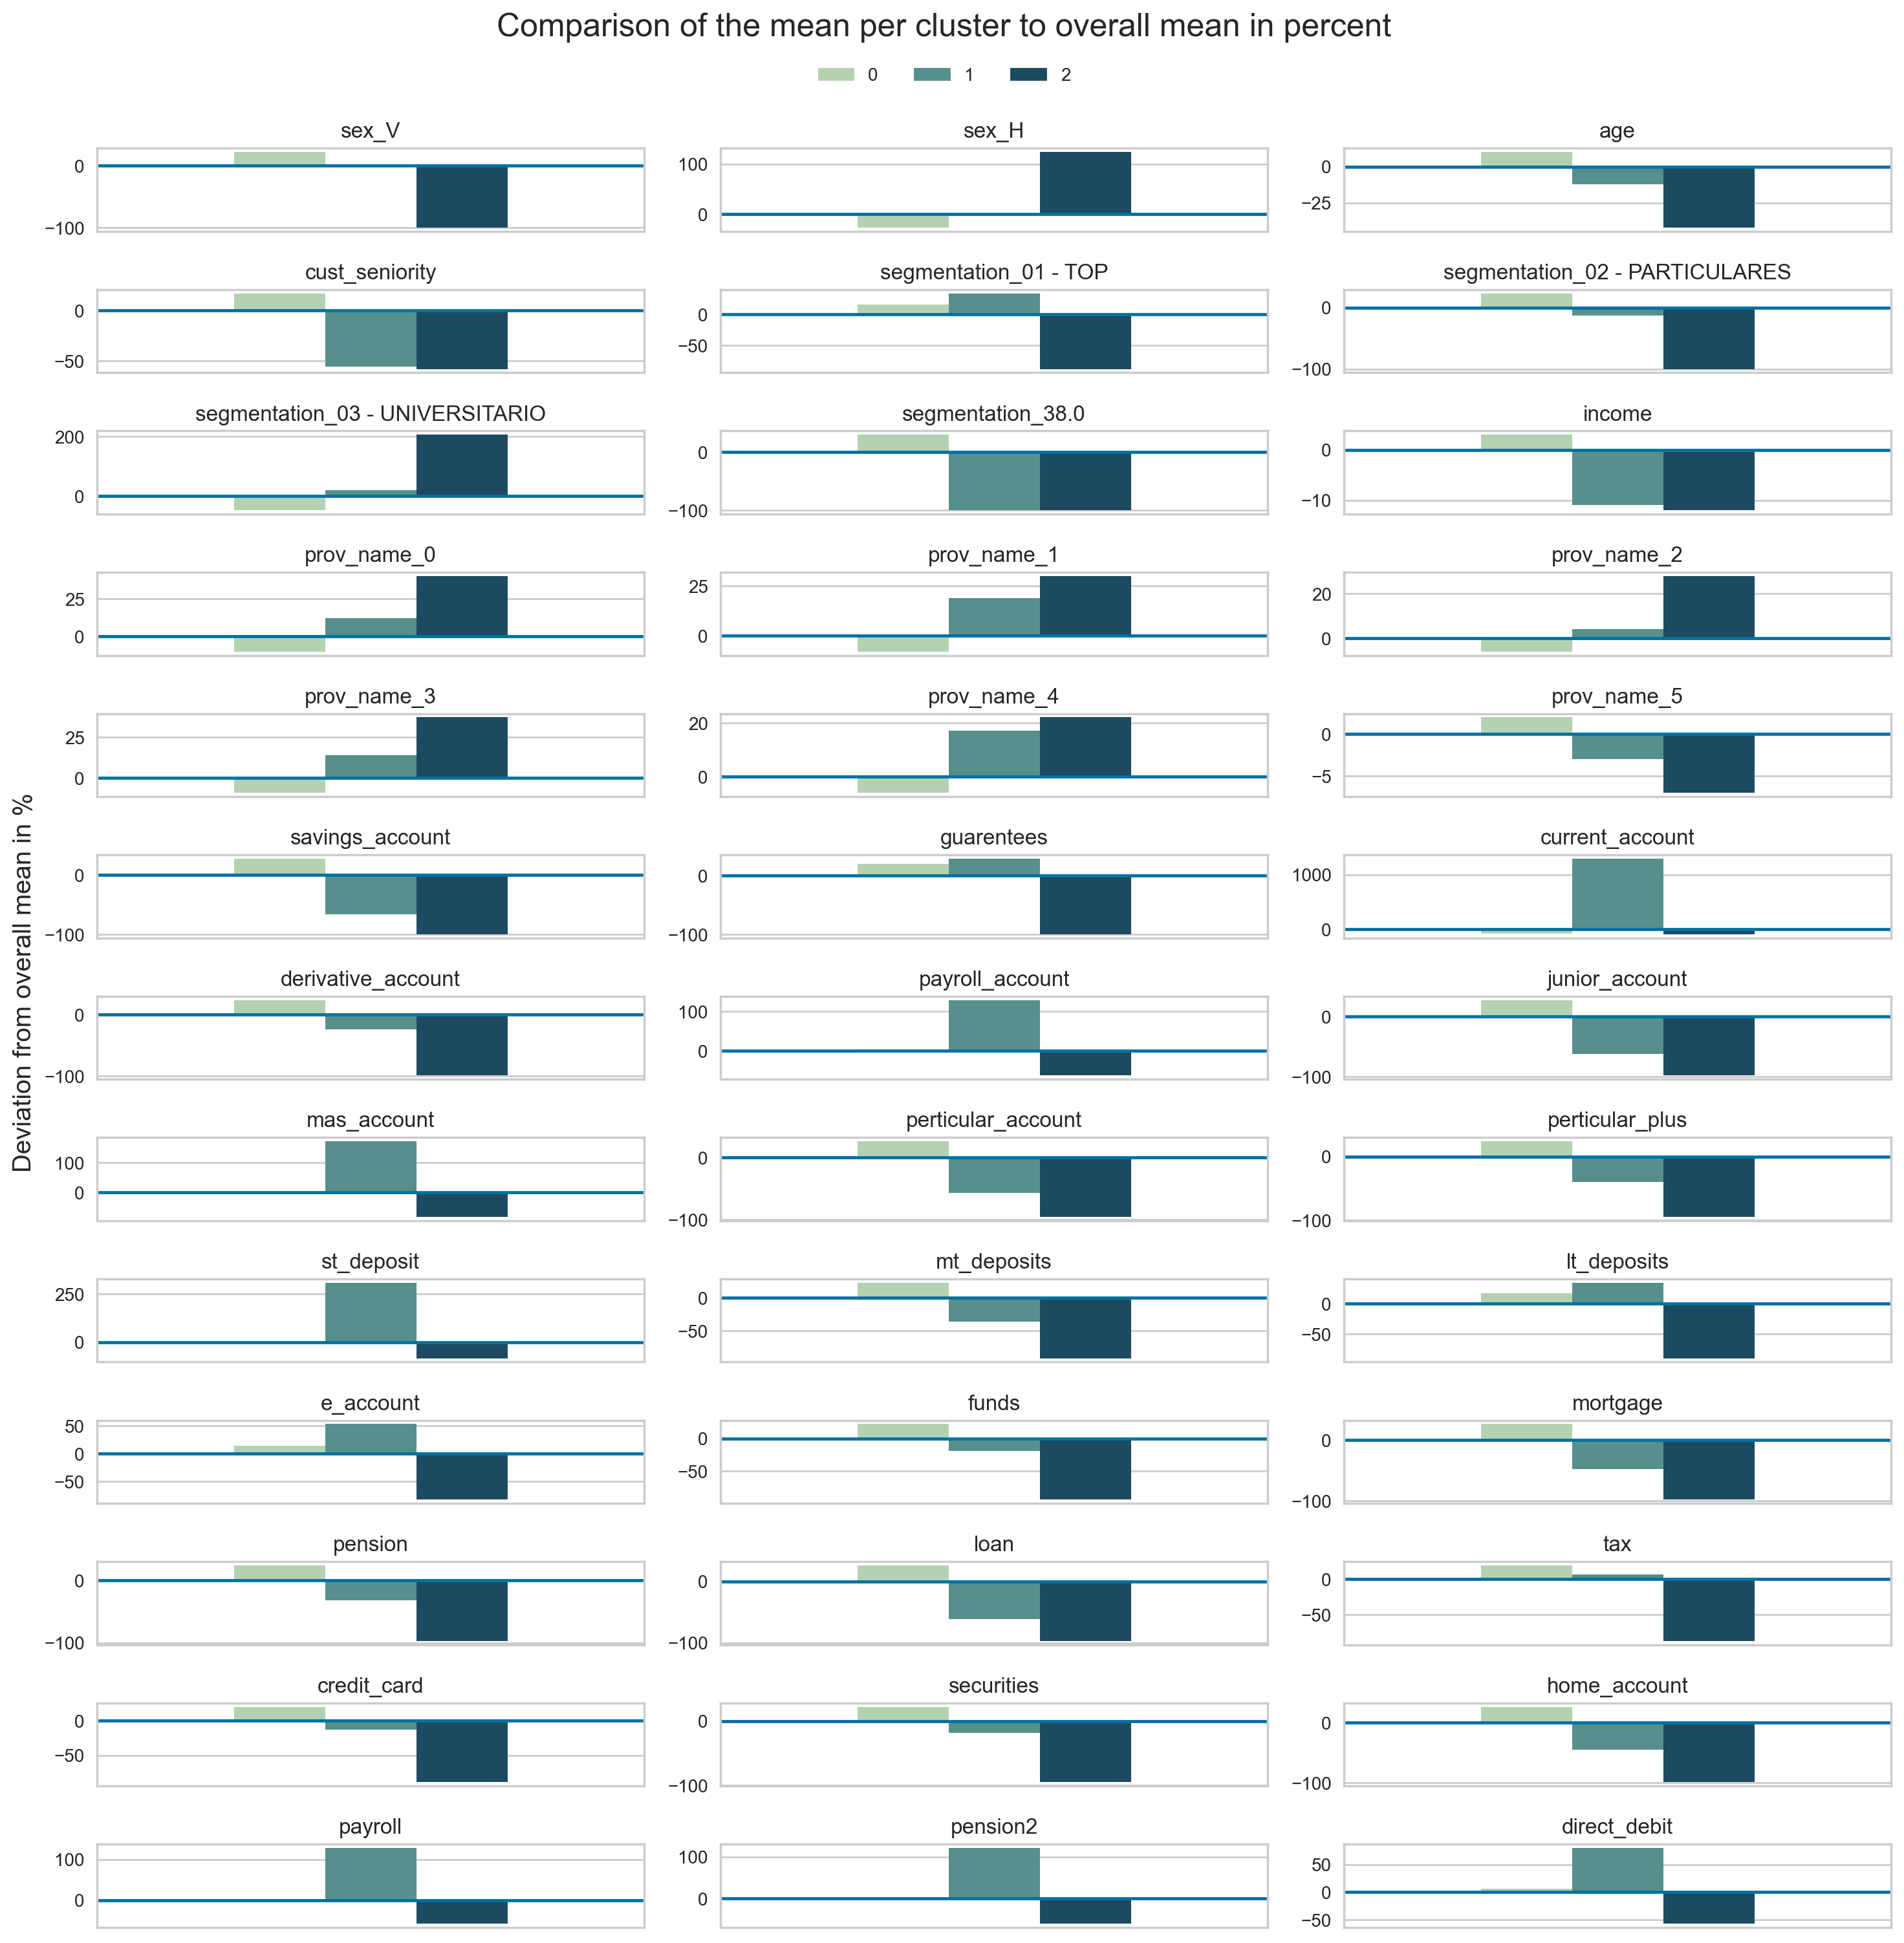

In [340]:
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")

In [432]:
def avg_check(prod):
    for col in target_columns:
        prod[col][prod[col] > prod[col].mean()] = 1
        prod[col][prod[col] < prod[col].mean()] = 0

In [410]:
prod2 = df[['sex','segmentation','prov_name','joining_channel']+target_columns]
prod2.drop_duplicates(keep='last' ,inplace=True,ignore_index=True)

In [411]:
onehot_columns = ['sex', 'segmentation', 'joining_channel']
binary_columns = ['prov_name']
enc_oh1= ce.OneHotEncoder(cols=onehot_columns ,handle_unknown='return_nan',return_df=True,use_cat_names=True)
enc_be1= ce.BinaryEncoder(cols=binary_columns,return_df=True)
prod_enc = enc_oh1.fit_transform(prod2)
prod_enc2 = enc_be1.fit_transform(prod_enc)
print(prod_enc2.columns)
print(prod_enc2.columns)
print(len(prod_enc2.columns))

Index(['sex_V', 'sex_H', 'segmentation_01 - TOP',
       'segmentation_02 - PARTICULARES', 'segmentation_03 - UNIVERSITARIO',
       'prov_name_0', 'prov_name_1', 'prov_name_2', 'prov_name_3',
       'prov_name_4', 'prov_name_5', 'joining_channel_KAT',
       'joining_channel_Others', 'joining_channel_KFA', 'joining_channel_KHN',
       'joining_channel_KFC', 'joining_channel_KHM', 'joining_channel_KHK',
       'joining_channel_KHE', 'joining_channel_KHQ', 'savings_account',
       'guarentees', 'current_account', 'derivative_account',
       'payroll_account', 'junior_account', 'mas_account',
       'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits',
       'lt_deposits', 'e_account', 'funds', 'mortgage', 'pension', 'loan',
       'tax', 'credit_card', 'securities', 'home_account', 'payroll',
       'pension2', 'direct_debit'],
      dtype='object')
Index(['sex_V', 'sex_H', 'segmentation_01 - TOP',
       'segmentation_02 - PARTICULARES', 'segmentation_03 - UNIVERSIT

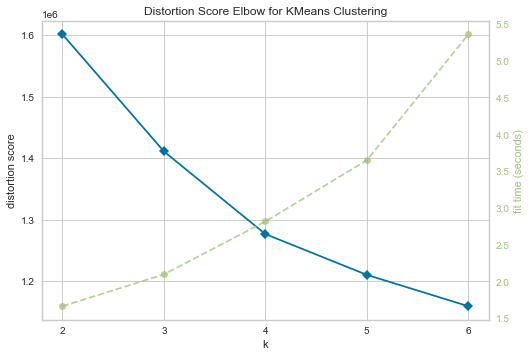

In [436]:
elbow_validation(prod_enc2,n=7)

Iteration for clusters:  2
Iteration for clusters:  3
Iteration for clusters:  4
Iteration for clusters:  5
Iteration for clusters:  6


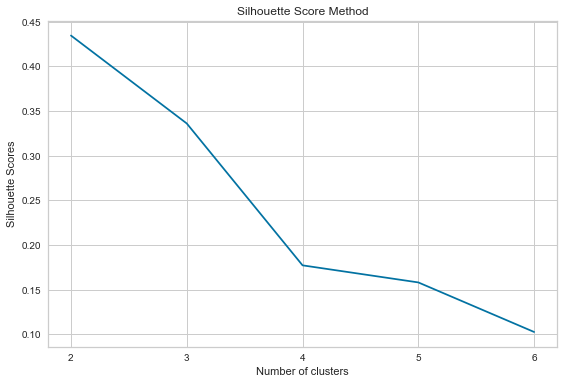

In [437]:
X = prod_enc2.sample(n=100000)

silhouette_scores1 = []
for k in range(2,7):
    print('Iteration for clusters: ',k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, random_state=432)
    km.fit(X)
    silhouette_scores1.append(silhouette_score(X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores1, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

Iteration for clusters:  2
Iteration for clusters:  3
Iteration for clusters:  4
Iteration for clusters:  5
Iteration for clusters:  6


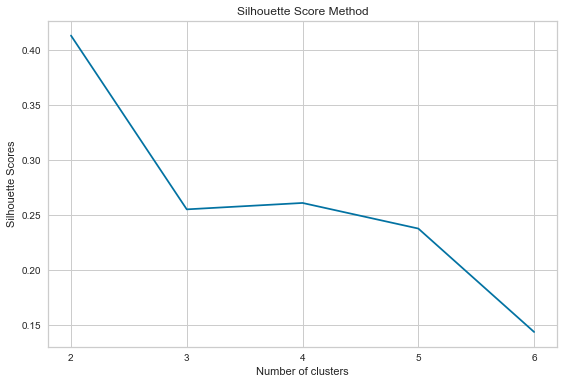

In [444]:
X = prod_enc2.sample(n=200000)

silhouette_scores1 = []
for k in range(2,7):
    print('Iteration for clusters: ',k)
    km = KMeans(n_clusters=k, 
                max_iter=10, 
                n_init=10, random_state=432)
    km.fit(X)
    silhouette_scores1.append(silhouette_score(X, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores1, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

In [412]:
kmeans = KMeans(n_clusters=3, n_init= 10 ,random_state = 101)
kmeans.fit(prod_enc2)
print(kmeans.inertia_)
print(kmeans.n_init)
pred = kmeans.predict(prod_enc2)
frame = pd.DataFrame(prod_enc2)
frame['cluster'] = pred
frame['cluster'].value_counts()

66677222.7828144
10


0    85510
1    71724
2    49501
Name: cluster, dtype: int64

In [413]:
X_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

In [414]:
X_std_mean

,0,1,2
sex_V,0.628511,0.561583,0.605018
sex_H,0.371489,0.438417,0.394982
segmentation_01 - TOP,0.155444,0.092368,0.200238
segmentation_02 - PARTICULARES,0.716910,0.690592,0.684976
segmentation_03 - UNIVERSITARIO,0.127646,0.217040,0.114786
prov_name_0,0.140299,0.170557,0.086483
prov_name_1,0.183136,0.223802,0.120927
prov_name_2,0.342825,0.393843,0.260500
prov_name_3,0.337844,0.377768,0.270883
prov_name_4,0.386025,0.433732,0.314034


In [445]:
kmeans = KMeans(n_clusters=2, n_init= 10 ,random_state = 101)
kmeans.fit(prod_enc2)
print(kmeans.inertia_)
print(kmeans.n_init)
pred = kmeans.predict(prod_enc2)
frame = pd.DataFrame(prod_enc2)
frame['cluster'] = pred
frame['cluster'].value_counts()

1770886.6136084883
10


0    174882
1     31853
Name: cluster, dtype: int64

In [446]:
X_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(frame.mean().drop('cluster'), columns=['mean']), 
                   frame.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

X_std_mean

,0,1
sex_V,0.604602,0.572568
sex_H,0.395398,0.427432
segmentation_01 - TOP,0.154184,0.089944
segmentation_02 - PARTICULARES,0.705630,0.669953
segmentation_03 - UNIVERSITARIO,0.140186,0.240103
prov_name_0,0.135108,0.153298
prov_name_1,0.176616,0.213826
prov_name_2,0.333110,0.383104
prov_name_3,0.330234,0.365460
prov_name_4,0.379582,0.416947


In [66]:
df

,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,cust_type,cust_rel,residence_index,foreigner_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,15889,F,ES,V,56,1/16/1995,0,255.0,1,1.0,A,1,0,KAT,0,1,28.0,MADRID,1.0,326124.90,01 - TOP,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
1,15890,A,ES,V,63,1/16/1995,0,256.0,1,1.0,A,1,0,KAT,0,1,28.0,MADRID,1.0,71461.20,01 - TOP,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
2,15891,N,ES,H,59,7/28/2015,0,246.0,0,1.0,A,1,0,KAT,0,1,28.0,MADRID,0.0,101489.34,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15892,F,ES,H,62,1/16/1995,0,256.0,1,1.0,A,1,0,KAT,0,1,28.0,MADRID,1.0,430477.41,01 - TOP,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
4,15893,N,ES,V,63,10/3/1997,0,256.0,1,1.0,A,1,0,KAT,0,1,28.0,MADRID,1.0,430477.41,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,1553685,N,ES,V,52,5/31/2016,1,0.0,1,1,I,1,0,Others,0,1,13.0,CIUDAD REAL,0.0,101489.34,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956641,1553686,N,ES,H,30,5/31/2016,1,0.0,1,1,I,1,1,Others,0,1,41.0,SEVILLA,0.0,101489.34,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956642,1553687,N,ES,V,21,5/31/2016,1,0.0,1,1,I,1,0,Others,0,1,28.0,MADRID,0.0,101489.34,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956643,1553688,N,ES,H,43,5/31/2016,1,0.0,1,1,I,1,0,Others,0,1,39.0,CANTABRIA,0.0,101489.34,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
final_df= df[['cust_code']+target_columns].copy()

In [73]:
final_df

,cust_code,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,15889,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
1,15890,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
2,15891,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15892,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
4,15893,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,1553685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956641,1553686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956642,1553687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956643,1553688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(final_df.values)
distances, indices = knn.kneighbors(final_df.values, n_neighbors=3)

KeyboardInterrupt: 

In [294]:
frame

,sex_V,sex_H,sex_38.0,age,cust_seniority,segmentation_01 - TOP,segmentation_02 - PARTICULARES,segmentation_03 - UNIVERSITARIO,segmentation_38.0,income,prov_name_0,prov_name_1,prov_name_2,prov_name_3,prov_name_4,prov_name_5,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit,cluster
0,1.0,0.0,0.0,0.333333,0.996094,1.0,0.0,0.0,0.0,0.011285,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2
1,1.0,0.0,0.0,0.376543,1.000000,1.0,0.0,0.0,0.0,0.002472,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,2
2,0.0,1.0,0.0,0.351852,0.960938,0.0,1.0,0.0,0.0,0.003511,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.370370,1.000000,1.0,0.0,0.0,0.0,0.014897,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,0
4,1.0,0.0,0.0,0.376543,1.000000,0.0,1.0,0.0,0.0,0.014897,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863410,1.0,0.0,0.0,0.308642,0.000000,0.0,1.0,0.0,0.0,0.003511,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
863411,0.0,1.0,0.0,0.172840,0.000000,0.0,1.0,0.0,0.0,0.003511,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863412,1.0,0.0,0.0,0.117284,0.000000,0.0,1.0,0.0,0.0,0.003511,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
863413,0.0,1.0,0.0,0.253086,0.000000,0.0,1.0,0.0,0.0,0.003511,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [295]:
frame.cluster.value_counts()

2    446578
0    360911
1     55926
Name: cluster, dtype: int64

In [ ]:
pivot = df[['cust_code']+target_columns]

In [297]:
pivot.index = pivot.cust_code

In [298]:
pivot.drop('cust_code',axis = 1, inplace=True)

In [299]:
pivot

,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
cust_code,,,,,,,,,,,,,,,,,,,,,,,,
15889,0,0,17,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,8,17,0,0,0,0
15890,0,0,0,0,17,0,0,0,17,0,0,0,17,0,0,17,0,0,17,0,0,17,17,17
15891,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15892,0,0,12,0,5,0,0,0,0,0,0,15,17,0,0,0,0,17,17,17,0,0,0,17
15893,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1553686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1553687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
pivot = pivot.T

In [301]:
pivot_norm = pivot.apply(lambda x: x - np.nanmean(x), axis=1)

In [302]:
from sklearn.metrics.pairwise import cosine_similarity

In [303]:
item_sim_df = pd.DataFrame(cosine_similarity(pivot_norm, pivot_norm), index=pivot_norm.index, columns=pivot_norm.index)
item_sim_df.head()

,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,mt_deposits,lt_deposits,e_account,funds,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
savings_account,1.000000,0.998662,0.303318,0.994853,0.623039,0.912037,0.923222,0.513763,0.717791,0.991603,0.982970,0.743829,0.608011,0.848901,0.940534,0.912898,0.972525,0.689944,0.745160,0.805806,0.959538,0.708721,0.694241,0.544340
guarentees,0.998662,1.000000,0.303524,0.995725,0.623716,0.912848,0.924060,0.513840,0.718421,0.992474,0.983840,0.744430,0.608684,0.849654,0.941314,0.913609,0.973380,0.690457,0.745928,0.806506,0.960185,0.709526,0.695033,0.544883
current_account,0.303318,0.303524,1.000000,0.303006,0.010414,0.234526,0.275506,0.221161,0.214303,0.301057,0.302413,0.260821,0.173050,0.276959,0.276508,0.273558,0.292246,0.184859,0.192540,0.269728,0.293511,0.081814,0.067025,0.166143
derivative_account,0.994853,0.995725,0.303006,1.000000,0.621869,0.909307,0.920465,0.512933,0.716060,0.988704,0.980105,0.741887,0.607021,0.847250,0.937782,0.910621,0.969705,0.688465,0.743608,0.805180,0.956657,0.707167,0.692788,0.543444
payroll_account,0.623039,0.623716,0.010414,0.621869,1.000000,0.561274,0.586092,0.348176,0.561994,0.619216,0.616290,0.526760,0.592278,0.571492,0.632103,0.606422,0.608233,0.633450,0.705256,0.569457,0.606717,0.904862,0.926163,0.742483


In [304]:
def get_similar_product(product_name):
    if product_name not in pivot_norm.index:
        return None, None
    else:
        similar_product = item_sim_df.sort_values(by=product_name, ascending=False).index[1:]
        similar_product_score = item_sim_df.sort_values(by=product_name, ascending=False).loc[:, product_name].tolist()[1:]
        return similar_product, similar_product_score

In [305]:
product, score = get_similar_product("current_account")
for x,y in zip(product[:10], score[:10]):
    print("{} with similarity of {}".format(x, y))

guarentees with similarity of 0.30352443095035864
savings_account with similarity of 0.3033182588086212
derivative_account with similarity of 0.30300579868263794
mt_deposits with similarity of 0.30241328244545496
st_deposit with similarity of 0.3010569353273609
home_account with similarity of 0.29351051535927214
loan with similarity of 0.2922459139362069
funds with similarity of 0.2769591055002287
mortgage with similarity of 0.27650752636000925
mas_account with similarity of 0.2755055916619034


In [306]:
def predict_buying(user_id, product_name, max_neighbor=10):
    product, scores = get_similar_product(product_name)
    product_arr = np.array([x for x in product])
    sim_arr = np.array([x for x in scores])
    

    filtering = pivot_norm[user_id].loc[product] != 0
    
    
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[product[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

In [307]:
product_index = pd.Series(range(24), index=target_columns)
product_index.head()

savings_account       0
guarentees            1
current_account       2
derivative_account    3
payroll_account       4
dtype: int64

In [308]:
def get_recommendation(user_id, n_product=7):
    predicted_rating = np.array([])
    
    for _product in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, round(predict_buying(user_id, _product),2))
    
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})

    filtering = (pivot_norm[user_id] < 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)
    
    return list(temp.name[:n_product])

In [309]:
get_recommendation(15890)

['tax',
 'funds',
 'securities',
 'perticular_account',
 'lt_deposits',
 'savings_account',
 'guarentees']